In [89]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack
import processing_signals as ps
import padasip as pa

# plt.figure(figsize=(10, 7))

In [90]:
model = np.load("MODEL.NPY")
model_agc = np.load("MODEL_AGC.NPY")
gather = np.load("GATHER.NPY")

print(model.shape, model_agc.shape, gather.shape)

(96, 2001) (96, 2001) (96, 2001)


In [91]:
def normalize(x):
    # print(x.max(axis=1))
    x_mean = x.mean(axis=1)
    x_max = x.max(axis=1)
    for i in range(x.shape[0]):
        x[i] -= x_mean[i]
        x[i] /= x_max[i]
    return x

In [92]:
model = normalize(model)
model_agc = normalize(model_agc)
gather = normalize(gather)

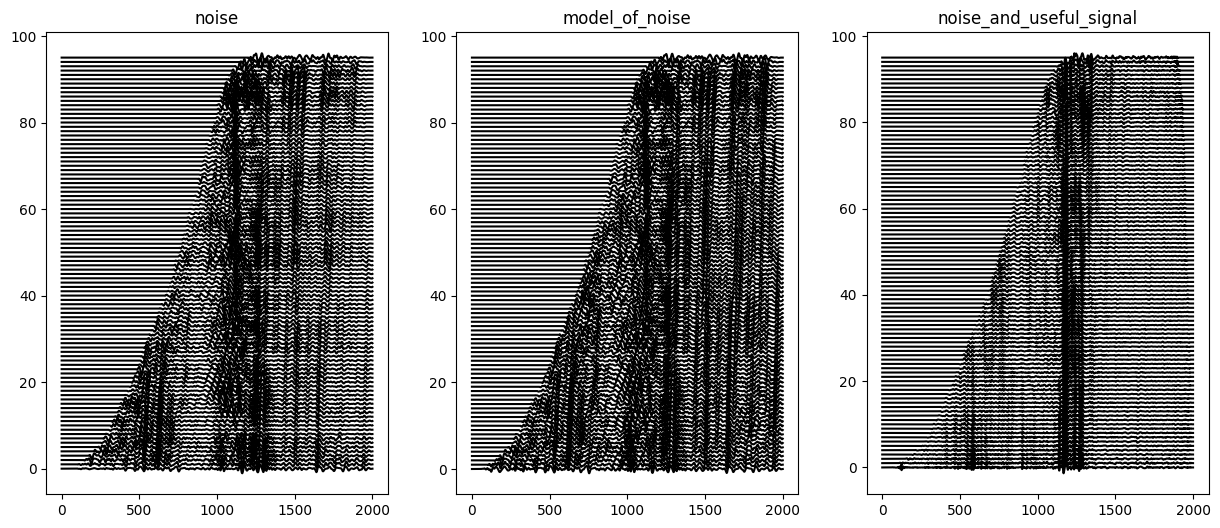

In [93]:
plt.figure(figsize=(15, 6))


shift = 1e+9
plt.subplot(1, 3, 1)
plt.title("noise")
for i in range(96):
    # max_value = np.abs(model[i]).max()
    plt.plot(i + model[i], color='black')

# shift_agc = 1e+5 / 5
shift_agc = shift
plt.subplot(1, 3, 2)
plt.title("model_of_noise")
for i in range(96):
    # max_value = np.abs(model_agc[i]).max()
    plt.plot(i + model_agc[i], color='black')


plt.subplot(1, 3, 3)
plt.title("noise_and_useful_signal")
for i in range(96):
    # max_value = np.abs(gather[i]).max()
    plt.plot(i + gather[i], color='black')

plt.show()

In [94]:
xgrid, tgrid = np.meshgrid(np.arange(2001), np.arange(96))

In [95]:
# ax = plt.axes(projection='3d')
# ax.plot_wireframe(xgrid, tgrid, model)
# # ax.plot(tgrid, xgrid, tempU.reshape((len(np.unique(tempT)), len(np.unique(tempX)))))
# plt.xlabel("ось X")
# plt.ylabel("ось T")
# plt.title("model")
# plt.show()

# Просто вывод ошибки между моделью шума и реальным шумом

In [96]:
# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MSE = {ps.MSE(model_agc, model):.10e}")
print(f"MSE zer = {ps.MSE(np.zeros_like(model), model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MAE = {ps.ME(model_agc, model):.10e}")
print(f"MAE zer = {ps.ME(np.zeros_like(model), model):.10e}")

MSE = 8.4771253169e-03
MSE zer = 5.2899993956e-02
MAE = 4.8784643412e-02
MAE zer = 1.3641026616e-01


# Мой LMS метод:

In [97]:
approx_real_weights_1d_lms = ps.fitting_of_LMS(model_agc, gather, 3, 0.00023, 1) #LMS
# print(approx_real_weights_1d_nlms, approx_real_weights_1d_nlms.shape)

In [98]:
approx_real_signal_1d_lms = ps.processing_of_signal(model_agc, approx_real_weights_1d_lms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MSE = {ps.MSE(approx_real_signal_1d_lms, model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_lms, model):.10e}")

(96, 2001) (3, 96)
MSE = 5.0629954785e-02
MAE = 1.3310961425e-01


In [99]:
number_trace = 50

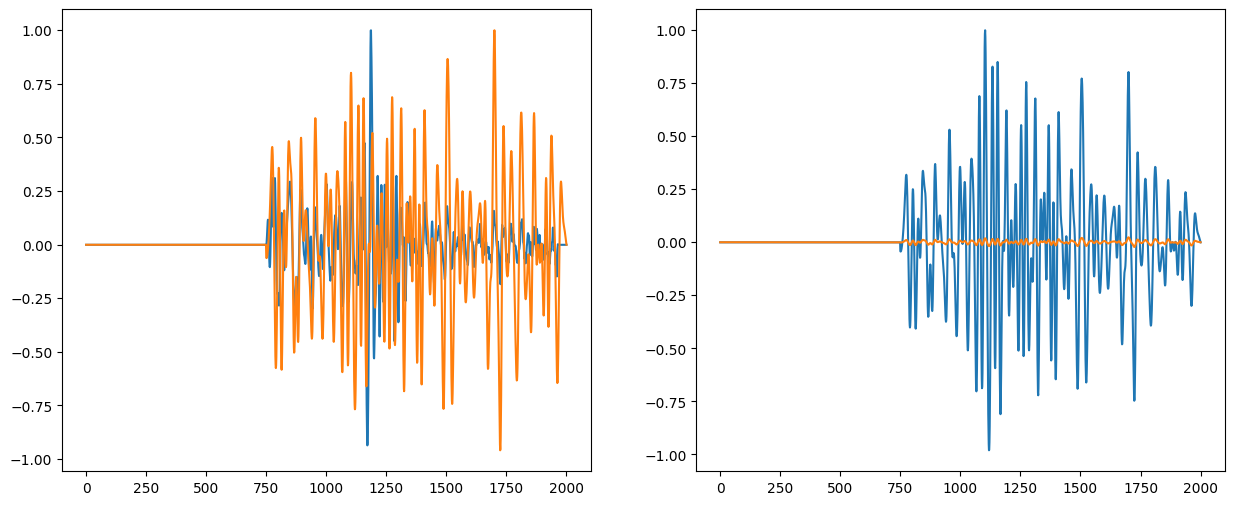

In [100]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(model_agc[number_trace])

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_lms[number_trace])


plt.show()

# Мой NLMS метод:

In [101]:
approx_real_weights_1d_nlms = ps.fitting_of_NLMS(model_agc, gather, 3, 0.00025, 1) #NLMS
# print(approx_real_weights_1d_nlms, approx_real_weights_1d_nlms.shape)

In [102]:
approx_real_signal_1d_nlms = ps.processing_of_signal(model_agc, approx_real_weights_1d_nlms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"MAE = {ps.ME(approx_real_signal_1d_nlms, model):.10e}")

(96, 2001) (3, 96)
MSE = 5.0448607653e-02
MAE = 1.3284215331e-01


In [103]:
number_trace = 50

In [104]:
# print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_nlms[number_trace], model[number_trace]):.3e}")

MAE = 1.463e-01


In [105]:
# print(f"MSE = {ps.MSE(model_agc[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(model_agc[number_trace], model[number_trace]):.3e}")

MAE = 3.687e-02


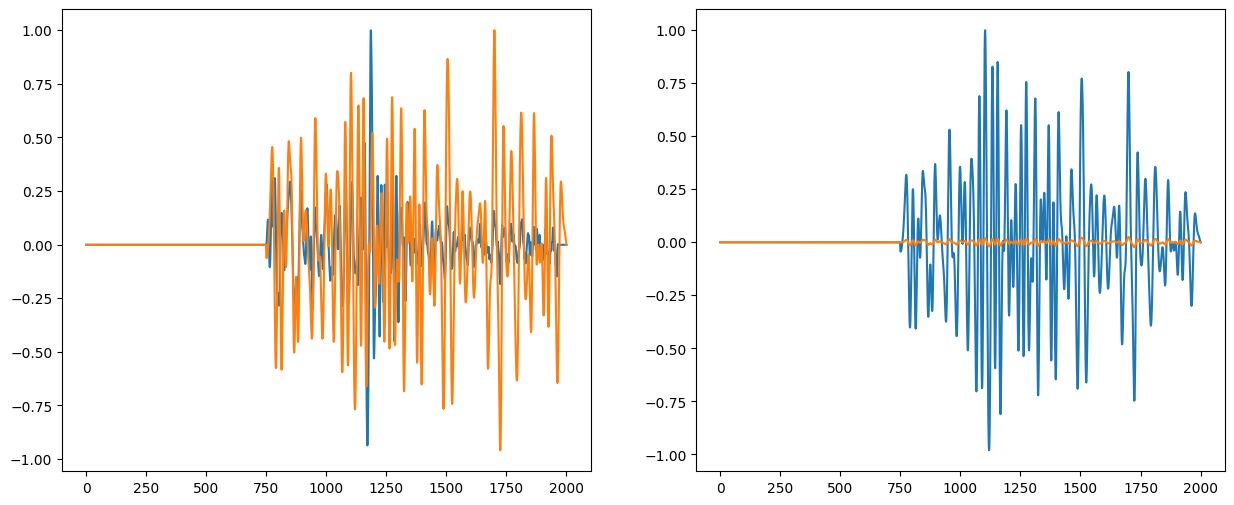

In [106]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(model_agc[number_trace])

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_nlms[number_trace])


plt.show()

# Мой RLS метод:

In [107]:
approx_real_weights_1d_rls = ps.fitting_of_RLS(model_agc, gather, 3, 0.9908)
# print(approx_real_weights_1d_rls, approx_real_weights_1d_rls.shape)

In [108]:
approx_real_signal_1d_rls = ps.processing_of_signal(model_agc, approx_real_weights_1d_rls)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"MAE = {ps.ME(approx_real_signal_1d_rls, model):.10e}")

(96, 2001) (3, 96)
MSE = 4.1153855622e-02
MAE = 1.1819168925e-01


In [109]:
number_trace = 50

In [110]:
# print(f"MSE = {ps.MSE(approx_real_signal_1d_rls[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_rls[number_trace], model[number_trace]):.3e}")

MAE = 1.341e-01


In [111]:
# print(f"MSE = {ps.MSE(model_agc[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(model_agc[number_trace], model[number_trace]):.3e}")

MAE = 3.687e-02


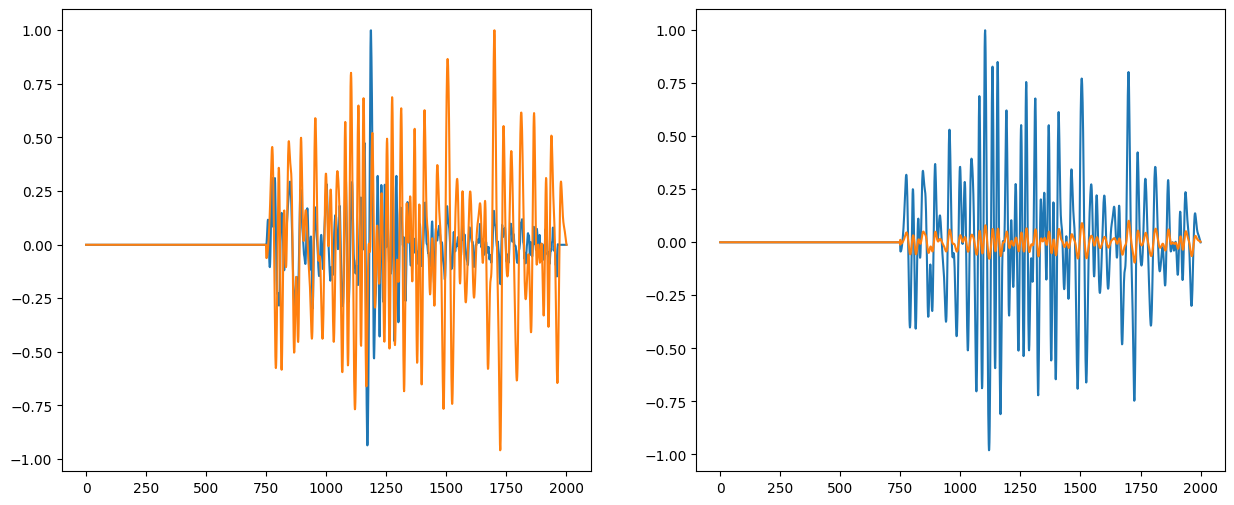

In [112]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(gather[number_trace])
plt.plot(model_agc[number_trace])

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_rls[number_trace])


plt.show()

# Общие выводы

In [114]:
print("My LMS")
# print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_lms, model):.3e}")
print("My NLMS")
# print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_nlms, model):.3e}")
print("My RLS")
# print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_rls, model):.3e}")
print("All error")
# print(f"MSE = {ps.MSE(np.zeros((96, 2001)), model):.3e}")
# print(f"ME = {ps.ME(np.zeros((96, 2001)), model):.3e}")
# print(f"MSE = {ps.MSE(model_agc, model):.3e}")
print(f"MAE = {ps.ME(model_agc, model):.3e}")

My LMS
MAE = 1.331e-01
My NLMS
MAE = 1.328e-01
My RLS
MAE = 1.182e-01
All error
MAE = 4.878e-02
